<a href="https://colab.research.google.com/github/DivyaMeenaSundaram/Deep_Learning_Lab/blob/main/Basics%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicted Output:
[[0.5       ]
 [0.41338242]
 [0.59145898]
 [0.5       ]]
Loss: 0.6987098665673257


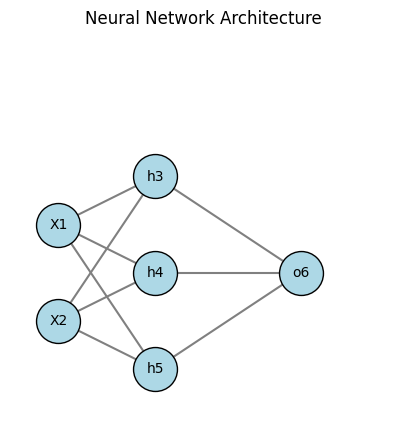

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define input features
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR-like classification
Y = np.array([[0], [1], [1], [0]])  # Expected output

# Define weights and biases
W1 = np.array([[0.5, -0.5, 0.2], [-0.5, 0.5, -0.3]])  # Weights for layer 1 (2 input features, 3 neurons in hidden layer)
b1 = np.array([[0.0, 0.0, 0.0]])  # Bias for layer 1 (3 neurons)
W2 = np.array([[0.7], [-0.7], [0.1]])  # Weights for output layer (3 neurons in hidden layer, 1 output)
b2 = np.array([[0.0]])  # Bias for output layer (1 neuron)

# Activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Forward pass
def forward_pass(X):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)
    return output

# Compute predictions
y_pred = forward_pass(X)
print("Predicted Output:")
print(y_pred)

# Compute loss (Binary Crossentropy)
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-12  # Avoid log(0) error
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

loss = binary_cross_entropy(Y, y_pred)
print("Loss:", loss)

# Visualization of the Neural Network
def draw_neural_network():
    plt.figure(figsize=(5, 5))
    plt.xlim(-1.5, 2.5)
    plt.ylim(-1.5, 2.5)

    # Define positions
    positions = {
        "X1": (-1, 0.5), "X2": (-1, -0.5),
        "h3": (0, 1), "h4": (0, 0), "h5": (0, -1),
        "o6": (1.5, 0)
    }

    # Draw nodes
    for node, pos in positions.items():
        plt.scatter(*pos, s=1000, color='lightblue', edgecolors='black', zorder=3)
        plt.text(pos[0], pos[1], node, fontsize=10, ha='center', va='center', zorder=4)

    # Draw edges
    edges = [("X1", "h3"), ("X1", "h4"), ("X1", "h5"),
             ("X2", "h3"), ("X2", "h4"), ("X2", "h5"),
             ("h3", "o6"), ("h4", "o6"), ("h5", "o6")]

    for start, end in edges:
        pos1, pos2 = positions[start], positions[end]
        plt.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], 'gray', zorder=2)

    plt.title("Neural Network Architecture")
    plt.axis('off')
    plt.show()

# Draw the neural network
draw_neural_network()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define input features
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR-like classification
Y = np.array([[0], [1], [1], [0]])  # Expected output

# Define weights and biases
W1 = np.array([[0.5, -0.5, 0.2], [-0.5, 0.5, -0.3]])  # Weights for layer 1 (2 input features, 3 neurons in hidden layer)
b1 = np.array([[0.0, 0.0, 0.0]])  # Bias for layer 1 (3 neurons)
W2 = np.array([[0.7], [-0.7], [0.1]])  # Weights for output layer (3 neurons in hidden layer, 1 output)
b2 = np.array([[0.0]])  # Bias for output layer (1 neuron)

# Learning rate (how big the step is when updating weights)
learning_rate = 0.1

# Activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

# Derivative of ReLU for backpropagation
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Forward pass
def forward_pass(X):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)
    return a1, output  # We return hidden layer output (a1) and final output

# Backpropagation function
def backpropagate(X, Y, a1, output):
    global W1, W2, b1, b2  # We will update these globally

    # Compute the error at the output layer
    output_error = Y - output  # How wrong the prediction is
    output_delta = output_error * sigmoid_derivative(output)  # How to adjust weights to fix this error

    # Compute error for hidden layer
    hidden_error = output_delta.dot(W2.T)  # Error from output delta
    hidden_delta = hidden_error * relu_derivative(a1)  # Adjust hidden layer weights

    # Update the weights and biases using the gradients
    W2 += a1.T.dot(output_delta) * learning_rate  # Update weights between hidden and output layer
    b2 += np.sum(output_delta, axis=0, keepdims=True) * learning_rate  # Update bias for output layer

    W1 += X.T.dot(hidden_delta) * learning_rate  # Update weights between input and hidden layer
    b1 += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate  # Update bias for hidden layer

# Training the model (running forward and backward passes multiple times)
for epoch in range(10000):  # Training for 10,000 iterations
    a1, output = forward_pass(X)  # Forward pass to get predictions
    backpropagate(X, Y, a1, output)  # Backpropagation to update weights

    if epoch % 1000 == 0:  # Print the loss every 1000 iterations
        loss = np.mean(np.square(Y - output))  # Mean Squared Error loss
        print(f"Epoch {epoch}, Loss: {loss}")

# Final predictions after training
a1, final_output = forward_pass(X)
print("Final Predicted Output after Training:")
print(final_output)



Epoch 0, Loss: 0.2527564875495044
Epoch 1000, Loss: 0.16706379847542388
Epoch 2000, Loss: 0.16680530527419363
Epoch 3000, Loss: 0.16674880699715516
Epoch 4000, Loss: 0.1667254693987577
Epoch 5000, Loss: 0.16671494753467997
Epoch 6000, Loss: 0.16670441858968832
Epoch 7000, Loss: 0.16669917704167897
Epoch 8000, Loss: 0.16669144557246157
Epoch 9000, Loss: 0.16668846810617274
Final Predicted Output after Training:
[[0.33345665]
 [0.33345665]
 [0.99063755]
 [0.33345665]]


Epoch 0, Loss: 0.2527564875495044
Epoch 1000, Loss: 0.16706379847542388
Epoch 2000, Loss: 0.16680530527419363
Epoch 3000, Loss: 0.16674880699715516
Epoch 4000, Loss: 0.1667254693987577
Epoch 5000, Loss: 0.16671494753467997
Epoch 6000, Loss: 0.16670441858968832
Epoch 7000, Loss: 0.16669917704167897
Epoch 8000, Loss: 0.16669144557246157
Epoch 9000, Loss: 0.16668846810617274


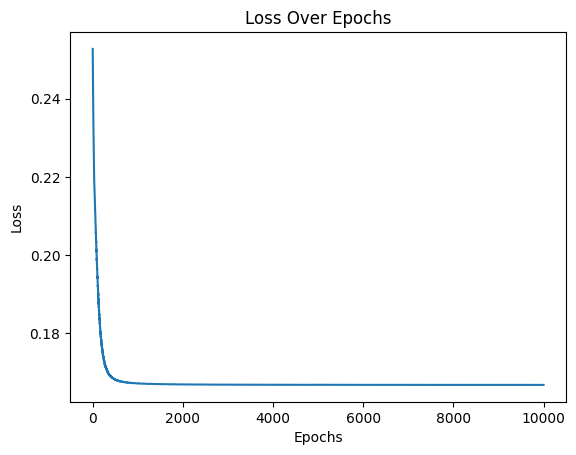

Final Predicted Output after Training:
[[0.33345665]
 [0.33345665]
 [0.99063755]
 [0.33345665]]
Final Loss after 10,000 epochs: 0.1666885919570167


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define input features
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR-like classification
Y = np.array([[0], [1], [1], [0]])  # Expected output

# Define weights and biases
W1 = np.array([[0.5, -0.5, 0.2], [-0.5, 0.5, -0.3]])  # Weights for layer 1 (2 input features, 3 neurons in hidden layer)
b1 = np.array([[0.0, 0.0, 0.0]])  # Bias for layer 1 (3 neurons)
W2 = np.array([[0.7], [-0.7], [0.1]])  # Weights for output layer (3 neurons in hidden layer, 1 output)
b2 = np.array([[0.0]])  # Bias for output layer (1 neuron)

# Learning rate (how big the step is when updating weights)
learning_rate = 0.1

# Activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

# Derivative of ReLU for backpropagation
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Forward pass
def forward_pass(X):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)
    return a1, output  # We return hidden layer output (a1) and final output

# Backpropagation function
def backpropagate(X, Y, a1, output):
    global W1, W2, b1, b2  # We will update these globally

    # Compute the error at the output layer
    output_error = Y - output  # How wrong the prediction is
    output_delta = output_error * sigmoid_derivative(output)  # How to adjust weights to fix this error

    # Compute error for hidden layer
    hidden_error = output_delta.dot(W2.T)  # Error from output delta
    hidden_delta = hidden_error * relu_derivative(a1)  # Adjust hidden layer weights

    # Update the weights and biases using the gradients
    W2 += a1.T.dot(output_delta) * learning_rate  # Update weights between hidden and output layer
    b2 += np.sum(output_delta, axis=0, keepdims=True) * learning_rate  # Update bias for output layer

    W1 += X.T.dot(hidden_delta) * learning_rate  # Update weights between input and hidden layer
    b1 += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate  # Update bias for hidden layer

# Store loss for each epoch to plot
losses = []

# Training the model (running forward and backward passes multiple times)
for epoch in range(10000):  # Training for 10,000 iterations
    a1, output = forward_pass(X)  # Forward pass to get predictions
    backpropagate(X, Y, a1, output)  # Backpropagation to update weights

    # Calculate loss after each epoch
    loss = np.mean(np.square(Y - output))  # Mean Squared Error loss
    losses.append(loss)  # Store loss for plotting

    # Optionally, print loss every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}")

# Plot loss over epochs
plt.plot(range(10000), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.show()

# Final predictions after training
a1, final_output = forward_pass(X)
final_loss = np.mean(np.square(Y - final_output))  # Calculate final loss
print("Final Predicted Output after Training:")
print(final_output)
print(f"Final Loss after 10,000 epochs: {final_loss}")


Epoch 0, Loss: 0.2527564875495044, Accuracy: 75.0%
Epoch 1000, Loss: 0.16706379847542388, Accuracy: 75.0%
Epoch 2000, Loss: 0.16680530527419363, Accuracy: 75.0%
Epoch 3000, Loss: 0.16674880699715516, Accuracy: 75.0%
Epoch 4000, Loss: 0.1667254693987577, Accuracy: 75.0%
Epoch 5000, Loss: 0.16671494753467997, Accuracy: 75.0%
Epoch 6000, Loss: 0.16670441858968832, Accuracy: 75.0%
Epoch 7000, Loss: 0.16669917704167897, Accuracy: 75.0%
Epoch 8000, Loss: 0.16669144557246157, Accuracy: 75.0%
Epoch 9000, Loss: 0.16668846810617274, Accuracy: 75.0%


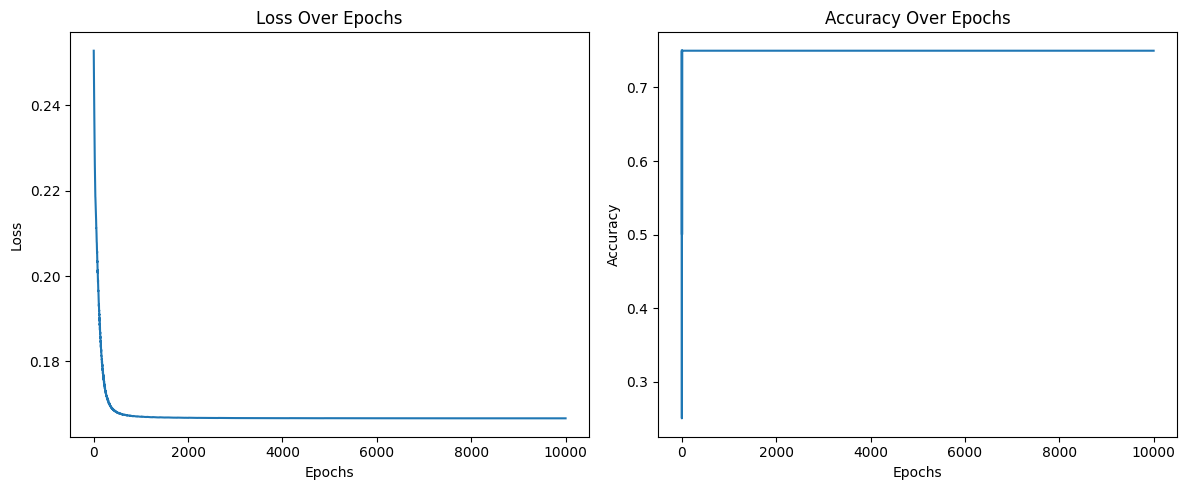

Final Predicted Output after Training:
[[0.33345665]
 [0.33345665]
 [0.99063755]
 [0.33345665]]
Final Loss after 10,000 epochs: 0.1666885919570167
Final Accuracy after 10,000 epochs: 75.0%


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define input features
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # XOR-like classification
Y = np.array([[0], [1], [1], [0]])  # Expected output

# Define weights and biases
W1 = np.array([[0.5, -0.5, 0.2], [-0.5, 0.5, -0.3]])  # Weights for layer 1 (2 input features, 3 neurons in hidden layer)
b1 = np.array([[0.0, 0.0, 0.0]])  # Bias for layer 1 (3 neurons)
W2 = np.array([[0.7], [-0.7], [0.1]])  # Weights for output layer (3 neurons in hidden layer, 1 output)
b2 = np.array([[0.0]])  # Bias for output layer (1 neuron)

# Learning rate (how big the step is when updating weights)
learning_rate = 0.1

# Activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of sigmoid for backpropagation
def sigmoid_derivative(x):
    return x * (1 - x)

# Derivative of ReLU for backpropagation
def relu_derivative(x):
    return np.where(x > 0, 1, 0)

# Forward pass
def forward_pass(X):
    z1 = np.dot(X, W1) + b1
    a1 = relu(z1)
    z2 = np.dot(a1, W2) + b2
    output = sigmoid(z2)
    return a1, output  # We return hidden layer output (a1) and final output

# Backpropagation function
def backpropagate(X, Y, a1, output):
    global W1, W2, b1, b2  # We will update these globally

    # Compute the error at the output layer
    output_error = Y - output  # How wrong the prediction is
    output_delta = output_error * sigmoid_derivative(output)  # How to adjust weights to fix this error

    # Compute error for hidden layer
    hidden_error = output_delta.dot(W2.T)  # Error from output delta
    hidden_delta = hidden_error * relu_derivative(a1)  # Adjust hidden layer weights

    # Update the weights and biases using the gradients
    W2 += a1.T.dot(output_delta) * learning_rate  # Update weights between hidden and output layer
    b2 += np.sum(output_delta, axis=0, keepdims=True) * learning_rate  # Update bias for output layer

    W1 += X.T.dot(hidden_delta) * learning_rate  # Update weights between input and hidden layer
    b1 += np.sum(hidden_delta, axis=0, keepdims=True) * learning_rate  # Update bias for hidden layer

# Store loss and accuracy for each epoch to plot
losses = []
accuracies = []

# Training the model (running forward and backward passes multiple times)
for epoch in range(10000):  # Training for 10,000 iterations
    a1, output = forward_pass(X)  # Forward pass to get predictions
    backpropagate(X, Y, a1, output)  # Backpropagation to update weights

    # Calculate loss (Mean Squared Error)
    loss = np.mean(np.square(Y - output))  # Mean Squared Error loss
    losses.append(loss)  # Store loss for plotting

    # Calculate accuracy
    predictions = (output > 0.5).astype(int)  # Apply threshold to sigmoid output
    accuracy = np.mean(predictions == Y)  # Compare predictions with true labels
    accuracies.append(accuracy)  # Store accuracy for plotting

    # Optionally, print loss and accuracy every 1000 epochs
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss}, Accuracy: {accuracy * 100}%")

# Plot loss over epochs
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(10000), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')

# Plot accuracy over epochs
plt.subplot(1, 2, 2)
plt.plot(range(10000), accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')

plt.tight_layout()
plt.show()

# Final predictions after training
a1, final_output = forward_pass(X)
final_loss = np.mean(np.square(Y - final_output))  # Calculate final loss
final_accuracy = np.mean((final_output > 0.5).astype(int) == Y)  # Calculate final accuracy

print("Final Predicted Output after Training:")
print(final_output)
print(f"Final Loss after 10,000 epochs: {final_loss}")
print(f"Final Accuracy after 10,000 epochs: {final_accuracy * 100}%")


Final Loss after 10000 epochs: 0.0011020986168859576
Training time: 8.23 seconds


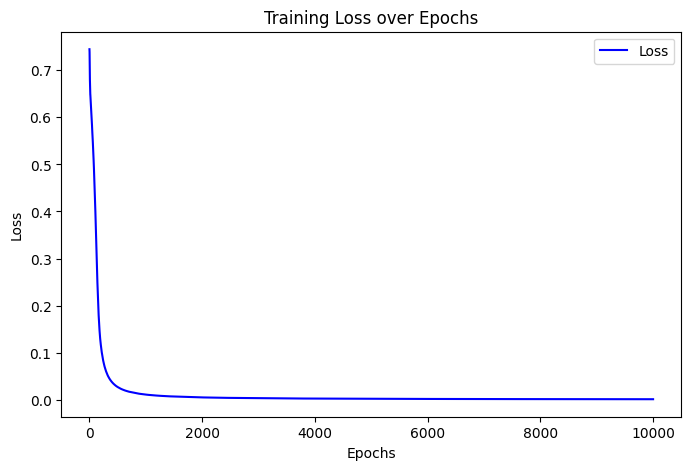

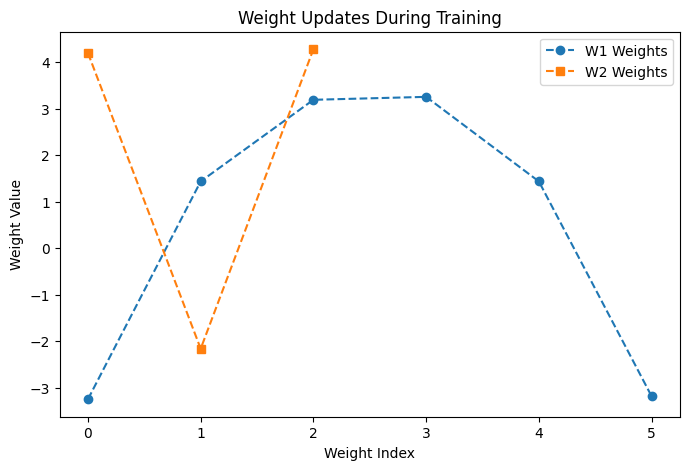

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Define input features (XOR problem)
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Input data
Y = np.array([[0], [1], [1], [0]])  # Expected output

# Neural Network Parameters
input_size = 2
hidden_size = 3
output_size = 1

W1 = np.random.randn(input_size, hidden_size)
W2 = np.random.randn(hidden_size, output_size)
b1 = np.zeros((1, hidden_size))
b2 = np.zeros((1, output_size))

# Learning rate and momentum parameters
initial_learning_rate = 0.1
momentum = 0.9
decay_rate = 0.0001

# Initialize velocity terms for momentum
v_W1, v_W2 = np.zeros_like(W1), np.zeros_like(W2)
v_b1, v_b2 = np.zeros_like(b1), np.zeros_like(b2)

# Activation functions
def relu(x):
    return np.maximum(0, x)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Binary Cross-Entropy Loss
def binary_cross_entropy(y_true, y_pred):
    epsilon = 1e-12
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

# Early stopping parameters
patience = 1000
best_loss = np.inf
epochs_without_improvement = 0

# Training parameters
epochs = 10000
batch_size = 2  # Using mini-batch gradient descent
loss_history = []
start_time = time.time()

# Training loop
for epoch in range(epochs):
    indices = np.random.permutation(len(X))  # Shuffle data
    X_shuffled, Y_shuffled = X[indices], Y[indices]

    epoch_loss = 0

    for i in range(0, len(X), batch_size):
        X_batch = X_shuffled[i:i + batch_size]
        Y_batch = Y_shuffled[i:i + batch_size]

        # Forward Pass
        z1 = np.dot(X_batch, W1) + b1
        a1 = relu(z1)
        z2 = np.dot(a1, W2) + b2
        output = sigmoid(z2)

        # Compute loss
        loss = binary_cross_entropy(Y_batch, output)
        epoch_loss += loss

        # Backpropagation
        d_output = (output - Y_batch) / Y_batch.shape[0]
        d_W2 = np.dot(a1.T, d_output)
        d_b2 = np.sum(d_output, axis=0, keepdims=True)

        d_a1 = np.dot(d_output, W2.T)
        d_z1 = d_a1 * (z1 > 0)
        d_W1 = np.dot(X_batch.T, d_z1)
        d_b1 = np.sum(d_z1, axis=0, keepdims=True)

        # Apply momentum update
        v_W1 = momentum * v_W1 + (1 - momentum) * d_W1
        v_W2 = momentum * v_W2 + (1 - momentum) * d_W2
        v_b1 = momentum * v_b1 + (1 - momentum) * d_b1
        v_b2 = momentum * v_b2 + (1 - momentum) * d_b2

        # Learning rate decay
        learning_rate = initial_learning_rate / (1 + decay_rate * epoch)

        # Update weights and biases
        W1 -= learning_rate * v_W1
        W2 -= learning_rate * v_W2
        b1 -= learning_rate * v_b1
        b2 -= learning_rate * v_b2

    # Store average loss per epoch
    loss_history.append(epoch_loss / (len(X) / batch_size))

    # Early Stopping Check
    if loss_history[-1] < best_loss:
        best_loss = loss_history[-1]
        epochs_without_improvement = 0
    else:
        epochs_without_improvement += 1

    if epochs_without_improvement > patience:
        print(f"Early stopping at epoch {epoch}")
        break

end_time = time.time()
print(f"Final Loss after {epoch+1} epochs: {loss_history[-1]}")
print(f"Training time: {end_time - start_time:.2f} seconds")

# Plot loss curve
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label='Loss', color='blue')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.show()

# Visualizing Weights
plt.figure(figsize=(8, 5))
plt.plot(W1.flatten(), marker='o', label='W1 Weights', linestyle='--')
plt.plot(W2.flatten(), marker='s', label='W2 Weights', linestyle='--')
plt.xlabel('Weight Index')
plt.ylabel('Weight Value')
plt.title('Weight Updates During Training')
plt.legend()
plt.show()


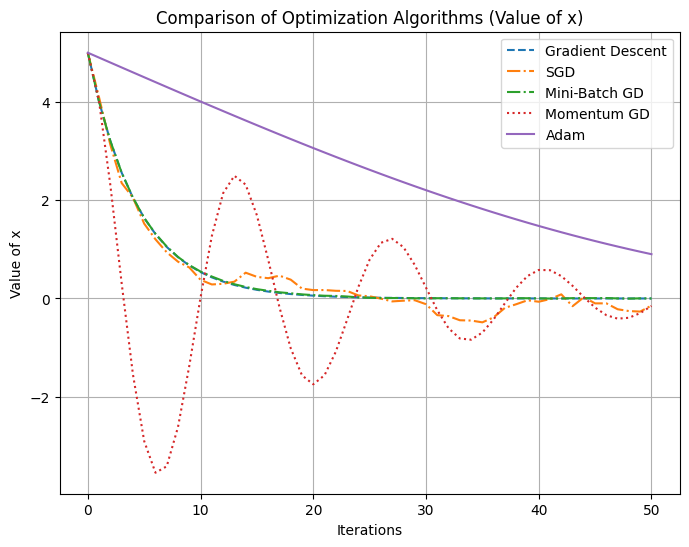

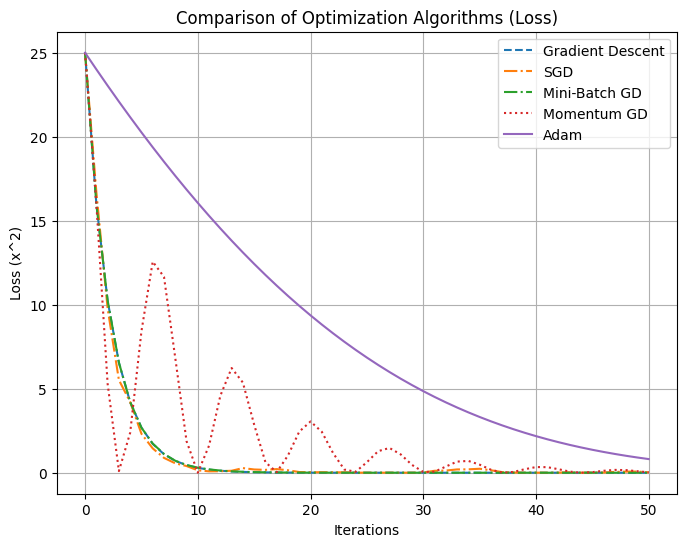

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to minimize (x^2)
def function(x):
    return x ** 2

# Gradient of function
def gradient(x):
    return 2 * x

# Optimization Methods
def gradient_descent(lr, epochs, x_init):
    x = x_init
    trajectory = [x]
    losses = [function(x)]
    for _ in range(epochs):
        x -= lr * gradient(x)
        trajectory.append(x)
        losses.append(function(x))
    return trajectory, losses

def sgd(lr, epochs, x_init):
    x = x_init
    trajectory = [x]
    losses = [function(x)]
    for _ in range(epochs):
        x -= lr * gradient(x) + np.random.normal(0, 0.1)  # Adding noise
        trajectory.append(x)
        losses.append(function(x))
    return trajectory, losses

def mini_batch_gd(lr, epochs, x_init, batch_size=5):
    x = x_init
    trajectory = [x]
    losses = [function(x)]
    for _ in range(epochs):
        batch_gradient = np.mean([gradient(x) + np.random.normal(0, 0.1) for _ in range(batch_size)])
        x -= lr * batch_gradient
        trajectory.append(x)
        losses.append(function(x))
    return trajectory, losses

def momentum_gd(lr, epochs, x_init, momentum=0.9):
    x = x_init
    v = 0  # Initialize velocity
    trajectory = [x]
    losses = [function(x)]
    for _ in range(epochs):
        v = momentum * v - lr * gradient(x)
        x += v
        trajectory.append(x)
        losses.append(function(x))
    return trajectory, losses

def adam(lr, epochs, x_init, beta1=0.9, beta2=0.999, epsilon=1e-8):
    x = x_init
    m, v = 0, 0
    trajectory = [x]
    losses = [function(x)]
    for t in range(1, epochs + 1):
        g = gradient(x)
        m = beta1 * m + (1 - beta1) * g
        v = beta2 * v + (1 - beta2) * (g ** 2)
        m_hat = m / (1 - beta1 ** t)
        v_hat = v / (1 - beta2 ** t)
        x -= lr * m_hat / (np.sqrt(v_hat) + epsilon)
        trajectory.append(x)
        losses.append(function(x))
    return trajectory, losses

# Parameters
epochs = 50
learning_rate = 0.1
x_init = 5  # Start far from minimum

# Get trajectories and losses
gd_trajectory, gd_losses = gradient_descent(learning_rate, epochs, x_init)
sgd_trajectory, sgd_losses = sgd(learning_rate, epochs, x_init)
mini_batch_trajectory, mini_batch_losses = mini_batch_gd(learning_rate, epochs, x_init)
momentum_trajectory, momentum_losses = momentum_gd(learning_rate, epochs, x_init)
adam_trajectory, adam_losses = adam(learning_rate, epochs, x_init)

# Plot x value convergence
plt.figure(figsize=(8, 6))
plt.plot(gd_trajectory, label="Gradient Descent", linestyle="--")
plt.plot(sgd_trajectory, label="SGD", linestyle="-.")
plt.plot(mini_batch_trajectory, label="Mini-Batch GD", linestyle="dashdot")
plt.plot(momentum_trajectory, label="Momentum GD", linestyle=":")
plt.plot(adam_trajectory, label="Adam", linestyle="-")
plt.xlabel("Iterations")
plt.ylabel("Value of x")
plt.title("Comparison of Optimization Algorithms (Value of x)")
plt.legend()
plt.grid()
plt.show()

# Plot loss convergence
plt.figure(figsize=(8, 6))
plt.plot(gd_losses, label="Gradient Descent", linestyle="--")
plt.plot(sgd_losses, label="SGD", linestyle="-.")
plt.plot(mini_batch_losses, label="Mini-Batch GD", linestyle="dashdot")
plt.plot(momentum_losses, label="Momentum GD", linestyle=":")
plt.plot(adam_losses, label="Adam", linestyle="-")
plt.xlabel("Iterations")
plt.ylabel("Loss (x^2)")
plt.title("Comparison of Optimization Algorithms (Loss)")
plt.legend()
plt.grid()
plt.show()
